## Observations and Insights 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")

# Display the data table for preview
study_data_df
# study_data_df.columns

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Checking the number of mice.
study_data_df["Mouse ID"].nunique()


249

In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = study_data_df[study_data_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_row


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 



In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_df.drop_duplicates("Mouse ID",keep = "last", inplace = True)
# drop_mouse = study_data_df[(study_data_df["Mouse ID"]=="g989")].index
# study_data_df.drop(drop_mouse, inplace= True)
study_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [71]:
# Checking the number of mice in the clean DataFrame.
study_data_df["Mouse ID"].nunique()

249

## Summary Statistics

In [100]:
for drug in study_data_df["Drug Regimen"].unique():
    print(drug)

Ramicane
Capomulin
Infubinol
Placebo
Ceftamin
Stelasyn
Zoniferol
Ketapril
Propriva
Naftisol


In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = study_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_stats = pd.DataFrame({"Mean" :tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation": tumor_std,"SEM":tumor_sem})
drug_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
study_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg('mean')
drug_group_stats = study_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(["mean", "median", 'var', "std", "sem"])
drug_group_stats = drug_group_stats.rename({"var":"variance", "std": "standard deviation"}, axis=1)
drug_group_stats

,mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

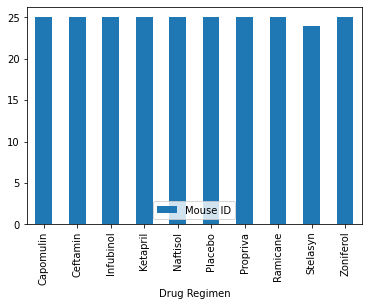

In [104]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#count # of mice equal to each unique drug name
# df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
# df.loc[row, column]
# df.loc[row, [column1, column2]]
# df[[column1, column2]]
mice_group = study_data_df[["Mouse ID", "Drug Regimen"]]
mice_group.drop_duplicates().groupby('Drug Regimen').count()

# df.plot

mice_group.drop_duplicates().groupby('Drug Regimen').count().plot(kind='bar')
    

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
